In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Importing and Exploring the data 

In [2]:
# converting salida.shw into a dataframe
COLS = ["CorsikaId","px","py","pz","xprime","yprime","t",
        "shower_id","prm_id","prm_energy","prm_theta","prm_phi"] # setting this as the column names

df = pd.read_csv("salida.shw", # path
                 comment="#", # ignore comments
                 sep=' ',# separation is space
                 header=None, # no other header set
                 names=COLS, # the name of the columns
                 engine="python"
)

In [3]:
df.head()

,CorsikaId,px,py,pz,xprime,yprime,t,shower_id,prm_id,prm_energy,prm_theta,prm_phi
0,13,-0.114199,-0.372837,0.478083,-1883.380,-14465.80,939.302,1,904,30.9688,23.546,-74.648
1,1,-0.001492,0.002428,0.005913,7351.120,-5730.52,949.183,2,1105,42.6129,41.027,135.252
2,1,0.006200,-0.002147,0.023437,3175.160,-9682.75,947.852,3,1206,63.5608,31.051,76.865
3,1,0.000810,0.000566,0.000284,268.873,-4097.83,954.677,4,1407,715.8770,57.390,80.799
4,1,0.013330,0.052226,0.029760,787.465,-3519.18,954.980,4,1407,715.8770,57.390,80.799


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CorsikaId   2771 non-null   int64  
 1   px          2771 non-null   float64
 2   py          2771 non-null   float64
 3   pz          2771 non-null   float64
 4   xprime      2771 non-null   float64
 5   yprime      2771 non-null   float64
 6   t           2771 non-null   float64
 7   shower_id   2771 non-null   int64  
 8   prm_id      2771 non-null   int64  
 9   prm_energy  2771 non-null   float64
 10  prm_theta   2771 non-null   float64
 11  prm_phi     2771 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 259.9 KB


In [5]:
# To get shower count 
len(df["shower_id"].unique())


269

## Subsetting the data so we only work with muons 

In [6]:
# Muons are CorsikaId 6 only.
muons = (df["CorsikaId"] == 6)
df = df[muons]

In [7]:
df['CorsikaId'].count()

np.int64(254)

In [8]:
df.head()

,CorsikaId,px,py,pz,xprime,yprime,t,shower_id,prm_id,prm_energy,prm_theta,prm_phi
17,6,0.743282,4.343220,2.383140,924.693,2263.07,955.531,4,1407,715.877,57.390,80.799
18,6,0.296160,1.390100,0.862786,2316.910,-4370.68,954.080,4,1407,715.877,57.390,80.799
94,6,-0.003004,0.159806,0.269206,2527.000,-1665.75,955.281,11,2010,320.425,11.704,115.476
96,6,0.247416,0.351382,1.587880,2730.910,-1411.77,955.258,11,2010,320.425,11.704,115.476
97,6,-0.027691,0.487120,2.175210,2017.200,-1228.84,955.562,11,2010,320.425,11.704,115.476


Resetting the index so there is a flow 

In [9]:
df = df.reset_index()

In [10]:
df.head()

,index,CorsikaId,px,py,pz,xprime,yprime,t,shower_id,prm_id,prm_energy,prm_theta,prm_phi
0,17,6,0.743282,4.343220,2.383140,924.693,2263.07,955.531,4,1407,715.877,57.390,80.799
1,18,6,0.296160,1.390100,0.862786,2316.910,-4370.68,954.080,4,1407,715.877,57.390,80.799
2,94,6,-0.003004,0.159806,0.269206,2527.000,-1665.75,955.281,11,2010,320.425,11.704,115.476
3,96,6,0.247416,0.351382,1.587880,2730.910,-1411.77,955.258,11,2010,320.425,11.704,115.476
4,97,6,-0.027691,0.487120,2.175210,2017.200,-1228.84,955.562,11,2010,320.425,11.704,115.476


## Computing Zenith angle from px,py,pz (momentum of the particle in x, y and z direction)

We use the formular for the Zenith Angle 
\begin{equation}
  \theta = arccos\left( \frac{pz}{\sqrt{px^2+py^2+pz^2}}\right)
\end{equation}


In [11]:
df['p'] = np.sqrt(df['px']**2 + df['py']**2 + df['pz']**2)
df['theta_rad'] = np.arccos(df['pz'] / df['p'])  # zenith angle in radians 

In [12]:
df.head()

,index,CorsikaId,px,py,pz,xprime,yprime,t,shower_id,prm_id,prm_energy,prm_theta,prm_phi,p,theta_rad
0,17,6,0.743282,4.343220,2.383140,924.693,2263.07,955.531,4,1407,715.877,57.390,80.799,5.009529,1.075012
1,18,6,0.296160,1.390100,0.862786,2316.910,-4370.68,954.080,4,1407,715.877,57.390,80.799,1.662675,1.025216
2,94,6,-0.003004,0.159806,0.269206,2527.000,-1665.75,955.281,11,2010,320.425,11.704,115.476,0.313080,0.535792
3,96,6,0.247416,0.351382,1.587880,2730.910,-1411.77,955.258,11,2010,320.425,11.704,115.476,1.645007,0.264311
4,97,6,-0.027691,0.487120,2.175210,2017.200,-1228.84,955.562,11,2010,320.425,11.704,115.476,2.229258,0.220651


We will use theta in degrees for creation of the bins

In [13]:
# creating a new column to store the zenith angle in degrees
df['theta'] = np.rad2deg(df['theta_rad'])

In [14]:
df.head()

,index,CorsikaId,px,py,pz,xprime,yprime,t,shower_id,prm_id,prm_energy,prm_theta,prm_phi,p,theta_rad,theta
0,17,6,0.743282,4.343220,2.383140,924.693,2263.07,955.531,4,1407,715.877,57.390,80.799,5.009529,1.075012,61.593673
1,18,6,0.296160,1.390100,0.862786,2316.910,-4370.68,954.080,4,1407,715.877,57.390,80.799,1.662675,1.025216,58.740542
2,94,6,-0.003004,0.159806,0.269206,2527.000,-1665.75,955.281,11,2010,320.425,11.704,115.476,0.313080,0.535792,30.698649
3,96,6,0.247416,0.351382,1.587880,2730.910,-1411.77,955.258,11,2010,320.425,11.704,115.476,1.645007,0.264311,15.143912
4,97,6,-0.027691,0.487120,2.175210,2017.200,-1228.84,955.562,11,2010,320.425,11.704,115.476,2.229258,0.220651,12.642375


## Binning the zenith angle and count events

In [15]:
# generating the bins from 0 to 90 stepping by 10 (degrees)
bins = np.arange(0, 91, 10)
print(bins)

[ 0 10 20 30 40 50 60 70 80 90]


In [16]:
# Counting how many muons fall in each 10 degree interval
counts, bin_edges = np.histogram(df['theta'], bins=bins)

counts -> number of muons in each 10 degree interval

bin_edges -> boundaries of each bin

In [17]:
#computing  the bin centres midpoint
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0
print(bin_centers)

[ 5. 15. 25. 35. 45. 55. 65. 75. 85.]


## Calculation of the Solid angle for the intervals

Solid angle is the measure of the amount of field of view form a paricular point that a given oject covers.

In simple terms it is how much of a sphere something covers.

We will be calcultating the solid angle of a **spherical zone** using the angle between the bin edges.
The formular is given by 
\begin{equation}
\Omega = 2\pi (cos\theta_1 - cos\theta_2)
\end{equation}

$2\pi$ Gives the whole rotaional symmetry around the z-axis


In [18]:
# converting bin edges to radians since np.cos works with radians
bin_edges_rad = np.deg2rad(bin_edges)
print(bin_edges)
print()
print(bin_edges_rad)

[ 0 10 20 30 40 50 60 70 80 90]

[0.         0.17453293 0.34906585 0.52359878 0.6981317  0.87266463
 1.04719755 1.22173048 1.3962634  1.57079633]


In [19]:
solid_angles = 2 * np.pi * (np.cos(bin_edges_rad[:-1]) - np.cos(bin_edges_rad[1:]))

## Calculating the Flux intensity

In [20]:
time = 1 # using the total run time for the simulation in seconds 
flux_intensity = counts / time / solid_angles

Defining the fit function where $n \approx 3$ in the equation $I(\theta) = I_0 cos^{n-1}(\theta)$ and fit the data

In [21]:
def cos_squared_model(theta_deg, I0):
    """Cosine-power model with n fixed at 3: I(theta) = I0 * cos^2(theta)"""
    theta_rad = np.deg2rad(theta_deg)
    return I0 * np.cos(theta_rad)**2

Fitting the binned data to the new model 
The only parameter to fit is $I_0$

In [22]:
try:
    popt, pcov = curve_fit(cos_squared_model, bin_centers, flux_intensity, p0=[1.0])
    I0_fit = popt[0]
    print(f"Fitted I0 with n=3: {I0_fit:.3f} (in arbitrary units)")
except RuntimeError as e:
    print(f"Could not fit the curve: {e}")
    I0_fit = 1.0 # Default value if fit fails

Fitted I0 with n=3: 85.867 (in arbitrary units)


## Break down of the curve fit function.

From documentation curve_fit it given by:
curve_fit(f, xdata, ydata, p0=None)

f : The model function -> $I_0 cos^{2}(\theta)$

xdata : Independent variable where data is measured -> bin_centres (in degrees)

ydata : Dependent data -> Flux intensity $I(\theta)$

p0 : Intial guess for the parameters -> $I(\theta)$ = 1.0



## What the curve fit function returns 

popt = Optimal Parameter: Best fit value of the model parameter ($I_0$)

pcov = Parameter Covariance Matrix : The estimated covariance of popt

## Plotting of the graph of Muon Intensity vs Zenith angle

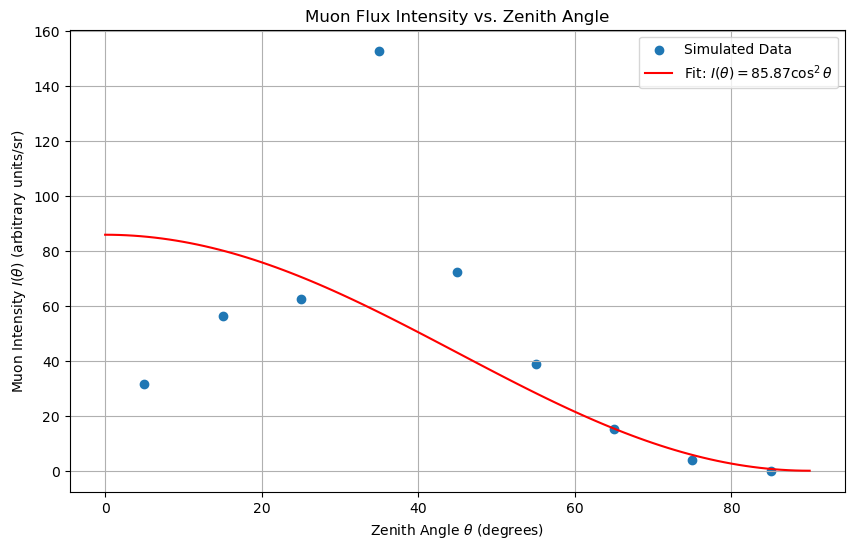

In [23]:
plt.figure(figsize=(10, 6))

# Plot the binned data points (flux vs zenith angle)
plt.scatter(bin_centers, flux_intensity, label='Simulated Data')


# generating 100 values from 0 to 90 
theta_range = np.linspace(0, 90, 100)

# fitting the curve with generated data 
fitted_curve = cos_squared_model(theta_range, I0_fit)

#plotting the curve on the same plot as 
plt.plot(theta_range, fitted_curve, 'r-', label=f'Fit: $I(\\theta) = {I0_fit:.2f} \\cos^2\\theta$')

# plotting the graph
plt.title('Muon Flux Intensity vs. Zenith Angle')
plt.xlabel('Zenith Angle $\\theta$ (degrees)')
plt.ylabel('Muon Intensity $I(\\theta)$ (arbitrary units/sr)')
plt.legend()
plt.grid(True)
plt.show()

Histogram to show which zenith had the highest muon flux counts

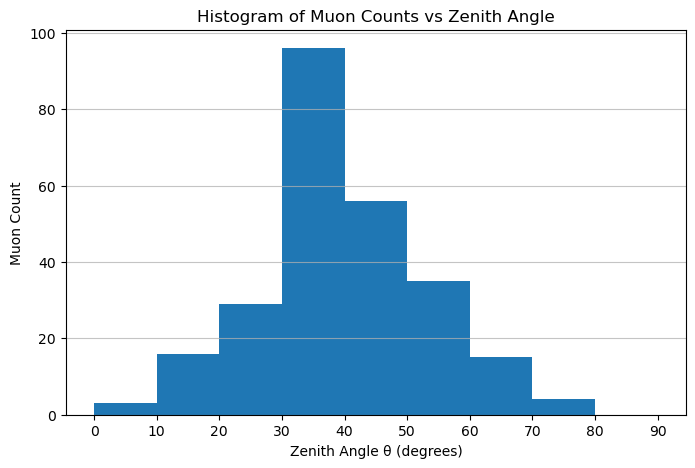

In [24]:
plt.figure(figsize=(8,5))
plt.hist(df['theta'], bins)
plt.xlabel('Zenith Angle θ (degrees)')
plt.ylabel('Muon Count')
plt.title('Histogram of Muon Counts vs Zenith Angle')
plt.xticks(bins)  # show bin edges on x-axis
plt.grid(axis='y', alpha=0.75)
plt.show()